In [ ]:
import time
inicio = time.time()

In [ ]:
# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
from tabulate import tabulate
import datetime as dt

# Machine learning packages
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Reducción de dimensiones
from sklearn.decomposition import PCA

# Regresión lineal
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Pretty print
from pprint import pprint

#SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

from keras.models import Sequential
from keras.layers import Dense, LSTM, Input, BatchNormalization, ReLU
from keras import Model


import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [ ]:
def TrainingSets(data, dataξ,step_back):
    train_data  = data.copy()
    train_dataξ = dataξ.copy()
    # training set
    X_train, ξ_train = [], []
    for i in range(len(train_data)-step_back - 1):
        a = train_data[i:(i+step_back)]
        X_train.append(a)
        ξ_train.append(train_dataξ[i + step_back])
    X_train = np.array(X_train); ξ_train = np.array(ξ_train);
    return  X_train, ξ_train




In [ ]:
#cargar datos desde drive acceso libre
FILEID = "1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Departamentos.zip && rm -rf /tmp/cookies.txt
!unzip Departamentos.zip
!dir

--2023-06-19 20:11:30--  https://docs.google.com/uc?export=download&confirm=&id=1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_
Resolving docs.google.com (docs.google.com)... 64.233.188.102, 64.233.188.101, 64.233.188.100, ...
Connecting to docs.google.com (docs.google.com)|64.233.188.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/et2bckt2i08aggk6cr75ck1m9chv88cf/1687205475000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=de1168c7-6c87-493b-8751-820abf24f272 [following]
--2023-06-19 20:11:39--  https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/et2bckt2i08aggk6cr75ck1m9chv88cf/1687205475000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=de1168c7-6c87-493b-8751-820abf24f272
Resolving doc-0c-6k-docs.googleusercontent.com (doc-0c-6k-docs.googleusercontent.com)... 108.177.97.132, 2

In [ ]:
df=pd.read_excel('/content/Demanda_Arreglo_Mean.xlsx')
df.fillna(df.mean(), inplace=True)

In [ ]:
df = df.drop('Date', axis=1)
# Se establese nuevamente en el indice temporal en la nueva variable 'a', y al DataFrame se incliye la informacion de frecuencia horaria 'H' de la base de datos
date_rng = pd.date_range(start='2020-10-01', end='2023-01-01', freq='H')
# Establece el índice del DataFrame a las fechas generadas
df.set_index(date_rng[0:-1], inplace=True)

In [ ]:
df.columns

Index(['Colombia', 'Bogota', 'Caribe Mar', 'Antioquia', 'Caribe Sol', 'Cali',
       'Santander', 'Boyaca', 'Valle del Cauca', 'Meta', 'Norte de Sanatender',
       'Caldas', 'Tolima', 'Huila', 'Cauca', 'Nariño', 'Pereira', 'Casanare',
       'Quindio', 'Choco', 'Tulua', 'Cartago', 'Costa Caribe',
       'Valle del Sibundoy'],
      dtype='object')

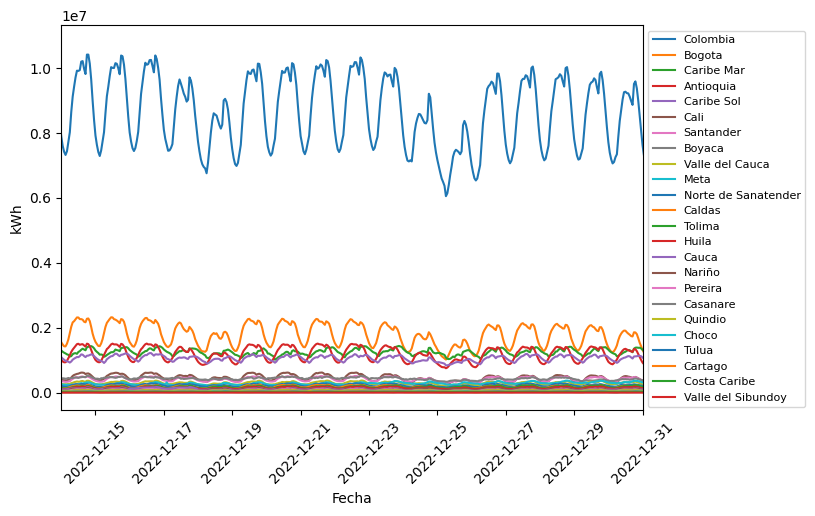

In [ ]:
plt.figure(figsize=(7.5,5))
plt.plot(df, label=df.columns)
# plt.title('Demanda Energia Horaria en Colombia kWh')
plt.xlabel('Fecha')
plt.ylabel('kWh')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.xlim(19340,19357)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# df.plot(kind='line',figsize=(10,7.5),title='Demanda Energia Horaria en Colombia kWh', grid=True, ylabel='kWh', xlabel='Fecha',xlim=('2022-12-01','2022-12-31'))

In [ ]:
df1=df.copy()

In [ ]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(df1)
df1=scaler.transform(df1)
#plt.plot(df1)

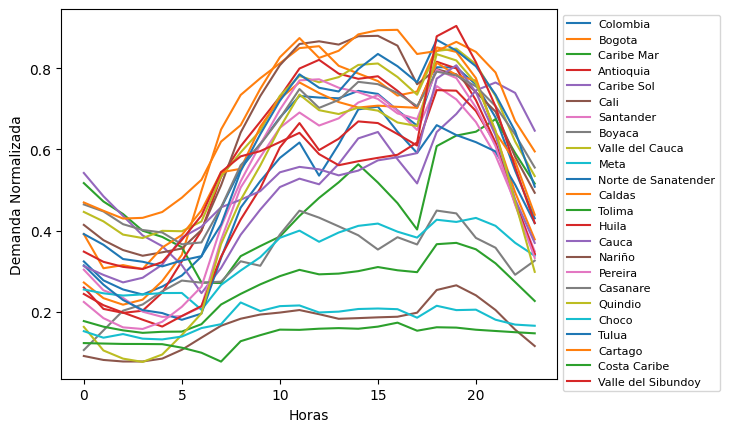

In [ ]:
plt.plot(df1[0:24,:], label=df.columns)
plt.xlabel('Horas')
plt.ylabel('Demanda Normalizada')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.show()

In [ ]:
Ts1=df1.copy()
out=Ts1[:,0]
print('Tamaño Serie Horaria: ', Ts1.shape)
print('Tamaño Serie Salida: ', out.shape)

Tamaño Serie Horaria:  (19728, 24)
Tamaño Serie Salida:  (19728,)


In [ ]:
#  Particion X,Y y Time_step/step_back/window
step_back = 1

X1, Y1 = TrainingSets(data = Ts1, dataξ = out,step_back=step_back)


#  Particion Train_Test

Part = 0.8

# Serie 1
X_test1 = X1[int(len(X1)*0.8):]
X_train1 = X1[:int(len(X1)*0.8)]
X_test1=X_test1[:,0,:]
X_train1=X_train1[:,0,:]

Y_test1 = Y1[int(len(Y1)*0.8):]
Y_train1 = Y1[:int(len(Y1)*0.8)]
# Y_test1=Y_test1[:,0]
# Y_train1=Y_train1[:,0]

In [ ]:
print('Tamaño X_train1: ', X_train1.shape, 'Tamaño Y_train1: ', Y_train1.shape, )
print('Tamaño X_test1: ', X_test1.shape, 'Tamaño Y_test1: ', Y_test1.shape, )
print('-----------------------------------------------------------------------')


Tamaño X_train1:  (15780, 24) Tamaño Y_train1:  (15780,)
Tamaño X_test1:  (3946, 24) Tamaño Y_test1:  (3946,)
-----------------------------------------------------------------------


In [ ]:
# Caracteristicos de los modelos a probar
"""
    1. 'scaler': Estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
    2. 'reg': Clasificador
    3. 'scaler': Estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
    4. 'rep': reducción de dimensiones
    5. 'reg': Pueden utilizar clase generada tsne_map()
"""

kernels = [RBF(length_scale=0.001), RBF(length_scale=0.01),  RBF(length_scale=0.1),
           RBF(length_scale=1), RBF(length_scale=10), RBF(length_scale=100)]

models = [
            [('scaler', StandardScaler()),
            ('reg', LinearRegression())],
            [('scaler', StandardScaler()), #Ajustar según ejercicio
            ('reg', Lasso())],
            [('scaler', StandardScaler()),
            ('reg', ElasticNet())],
            [('scaler', StandardScaler()),
            ('reg', SGDRegressor())],
            [('scaler', StandardScaler()),
            ('reg', BayesianRidge())],
            [('scaler', StandardScaler()),
            ('reg', SVR())]
        ]

model_names = ['LinearR', 'Lasso', 'Elastic', 'SGDReg', 'BayesRid', 'SVR']

# Parametros de búsqueda por malla
"""
    Parametros n_neighbors debe ser siempre un int
"""

parameters =[{'reg__n_jobs' : [-1, 1, 4]},
             {'reg__alpha' : [0,1e-3,1e-2,0.1,1,10,100,1000]},
             {'reg__alpha' : [ 0,1e-3,0.1,1,10,100],
              'reg__l1_ratio' : [0, 0,5, 1]},
             {'reg__alpha' : [ 0,1e-3,1e-2,0.1,1],
              'reg__l1_ratio' : [0,0.15, 1]},
             {'reg__alpha_1' : [1e-6, 1e-3, 1],
              'reg__alpha_2' : [1e-6, 1e-3, 1],
              'reg__lambda_1' : [1e-6, 1e-3, 1],
              'reg__lambda_2' : [1e-6, 1e-3, 1]},
             {'reg__kernel' : ['rbf', 'poly'],
              'reg__C' : [0.1, 0.5, 1],
              'reg__epsilon' : [1e-3, 0.1],
              'reg__max_iter' : [10000]}
             ]

In [ ]:
forecasting_ML = []

for j in range(len(models)):
  # Seleccion de modelo y parámetros
  method = models[j]
  parameter = parameters[j]

  print("Model: {model}".format(model=model_names[j]))

  model = GridSearchCV(Pipeline(method),
                       parameter,
                       cv=5,
                       verbose=5,
                       n_jobs=-1,
                       scoring='neg_mean_absolute_error')

  # Generar modelo
  model.fit(X_train1, Y_train1)
  # Estimar salida conjunto de test
  y_pred = model.predict(X_test1)
  forecasting_ML.append(y_pred)

Model: LinearR
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Model: Lasso
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Model: Elastic
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Model: SGDReg
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Model: BayesRid
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Model: SVR
Fitting 5 folds for each of 12 candidates, totalling 60 fits


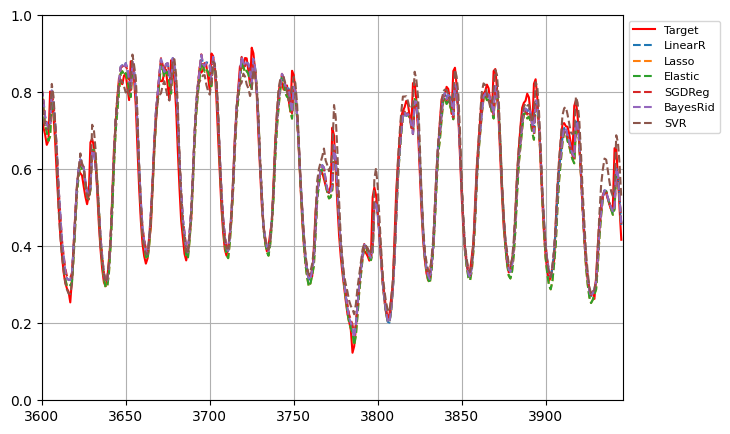

╒═════════════╤════════════╤════════════╤════════════╤════════════╤════════════╤════════════╕
│ Metrics     │    LinearR │      Lasso │    Elastic │     SGDReg │   BayesRid │        SVR │
╞═════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╡
│ MSE         │ 0.04259    │ 0.04246    │ 0.04246    │ 0.04346    │ 0.04262    │ 0.04105    │
├─────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┤
│ RMSE        │ 0.00181351 │ 0.00180291 │ 0.00180291 │ 0.00188893 │ 0.00181671 │ 0.00168541 │
├─────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┤
│ MAE         │ 0.03324    │ 0.03284    │ 0.03284    │ 0.03405    │ 0.03329    │ 0.03009    │
├─────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┤
│ R2          │ 0.955      │ 0.95526    │ 0.95526    │ 0.95313    │ 0.95492    │ 0.95818    │
├─────────────┼────────────┼────────────┼────────────┼──────

In [ ]:
plt.figure(figsize=(7.5,5))
plt.plot(Y_test1, label='Target', c='r')
for i in range(len(forecasting_ML)):
  plt.plot(forecasting_ML[i], label=model_names[i], linestyle='--')
plt.xlim(3600,len(forecasting_ML[i]))
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()


col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['Metrics','LinearR', 'Lasso', 'Elastic', 'SGDReg', 'BayesRid','SVR'], ["MSE"], ["RMSE"], ["MAE"], ["R2"],['cnSMAPE'],['P_Value_PS'],['P_Value_TT'],['P_Value_Var']
for k in range(6):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_ML[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_ML[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_ML[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_ML[k]),5))
  mape=mean_absolute_percentage_error(Y_test1, forecasting_ML[k])
  smape = 2 * mape * 100 / (100 - mape)
  cnSMAPE.append(round(1-(smape/2),5))
  correlation, p_value = stats.pearsonr(Y_test1, forecasting_ML[k])
  P_Value_PS.append(p_value)
  correlation, p_value = stats.ttest_ind(Y_test1, forecasting_ML[k])
  P_Value_TT.append(p_value)
  statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_ML[k].reshape(len(Y_test1)))
  P_Value_Var.append(p_value3)

tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))


In [ ]:
Ts1=df1[:,1:].copy()
out=Ts1[:,0]
print('Tamaño Serie Horaria: ', Ts1.shape)
print('Tamaño Serie Salida: ', out.shape)

Tamaño Serie Horaria:  (19728, 23)
Tamaño Serie Salida:  (19728,)


In [ ]:
#  Particion X,Y y Time_step/step_back/window
step_back = 1

X1, Y1 = TrainingSets(data = Ts1, dataξ = out,step_back=step_back)


#  Particion Train_Test

Part = 0.8

# Serie 1
X_test1 = X1[int(len(X1)*0.8):]
X_train1 = X1[:int(len(X1)*0.8)]
X_test1=X_test1[:,0,:]
X_train1=X_train1[:,0,:]

Y_test1 = Y1[int(len(Y1)*0.8):]
Y_train1 = Y1[:int(len(Y1)*0.8)]
# Y_test1=Y_test1[:,0]
# Y_train1=Y_train1[:,0]

In [ ]:
print('Tamaño X_train1: ', X_train1.shape, 'Tamaño Y_train1: ', Y_train1.shape, )
print('Tamaño X_test1: ', X_test1.shape, 'Tamaño Y_test1: ', Y_test1.shape, )
print('-----------------------------------------------------------------------')


Tamaño X_train1:  (15780, 23) Tamaño Y_train1:  (15780,)
Tamaño X_test1:  (3946, 23) Tamaño Y_test1:  (3946,)
-----------------------------------------------------------------------


In [ ]:
forecasting_ML2 = []

for j in range(len(models)):
  # Seleccion de modelo y parámetros
  method = models[j]
  parameter = parameters[j]

  print("Model: {model}".format(model=model_names[j]))

  model = GridSearchCV(Pipeline(method),
                       parameter,
                       cv=5,
                       verbose=5,
                       n_jobs=-1,
                       scoring='neg_mean_absolute_error')

  # Generar modelo
  model.fit(X_train1, Y_train1)
  # Estimar salida conjunto de test
  y_pred = model.predict(X_test1)
  forecasting_ML2.append(y_pred)

Model: LinearR
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Model: Lasso
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Model: Elastic
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Model: SGDReg
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Model: BayesRid
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Model: SVR
Fitting 5 folds for each of 12 candidates, totalling 60 fits


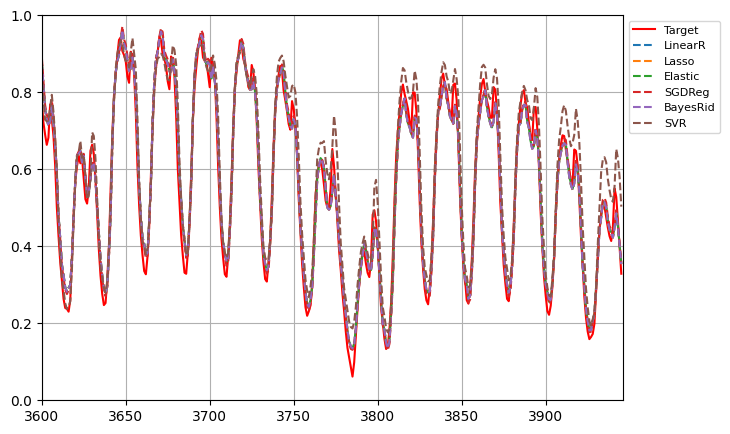

╒═════════════╤═══════════════╤════════════╤════════════╤════════════╤════════════╤════════════╕
│ Metrics     │   NorSC-KRRBF │    LinearR │      Lasso │    Elastic │     SGDReg │   BayesRid │
╞═════════════╪═══════════════╪════════════╪════════════╪════════════╪════════════╪════════════╡
│ MSE         │    0.04848    │ 0.04848    │ 0.04871    │ 0.04968    │ 0.04849    │ 0.04833    │
├─────────────┼───────────────┼────────────┼────────────┼────────────┼────────────┼────────────┤
│ RMSE        │    0.00235005 │ 0.00235003 │ 0.00237229 │ 0.00246795 │ 0.00235105 │ 0.00233572 │
├─────────────┼───────────────┼────────────┼────────────┼────────────┼────────────┼────────────┤
│ MAE         │    0.03813    │ 0.03813    │ 0.03825    │ 0.0388     │ 0.03814    │ 0.03619    │
├─────────────┼───────────────┼────────────┼────────────┼────────────┼────────────┼────────────┤
│ R2          │    0.95588    │ 0.95588    │ 0.95546    │ 0.95367    │ 0.95586    │ 0.95615    │
├─────────────┼───────────────

In [ ]:
plt.figure(figsize=(7.5,5))
plt.plot(Y_test1, label='Target', c='r')
for i in range(len(forecasting_ML2)):
  plt.plot(forecasting_ML2[i], label=model_names[i], linestyle='--')
plt.xlim(3600,len(forecasting_ML2[i]))
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()


col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['Metrics','LinearR', 'Lasso', 'Elastic', 'SGDReg', 'BayesRid','SVR'], ["MSE"], ["RMSE"], ["MAE"], ["R2"],['cnSMAPE'],['P_Value_PS'],['P_Value_TT'], ['P_Value_Var']
for k in range(6):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_ML2[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_ML2[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_ML2[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_ML2[k]),5))
  mape=mean_absolute_percentage_error(Y_test1, forecasting_ML2[k])
  smape = 2 * mape * 100 / (100 - mape)
  cnSMAPE.append(round(1-(smape/2),5))
  correlation, p_value = stats.pearsonr(Y_test1, forecasting_ML2[k])
  P_Value_PS.append(p_value)
  correlation, p_value = stats.ttest_ind(Y_test1, forecasting_ML2[k])
  P_Value_TT.append(p_value)
  statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_ML2[k].reshape(len(Y_test1)))
  P_Value_Var.append(p_value3)



tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))